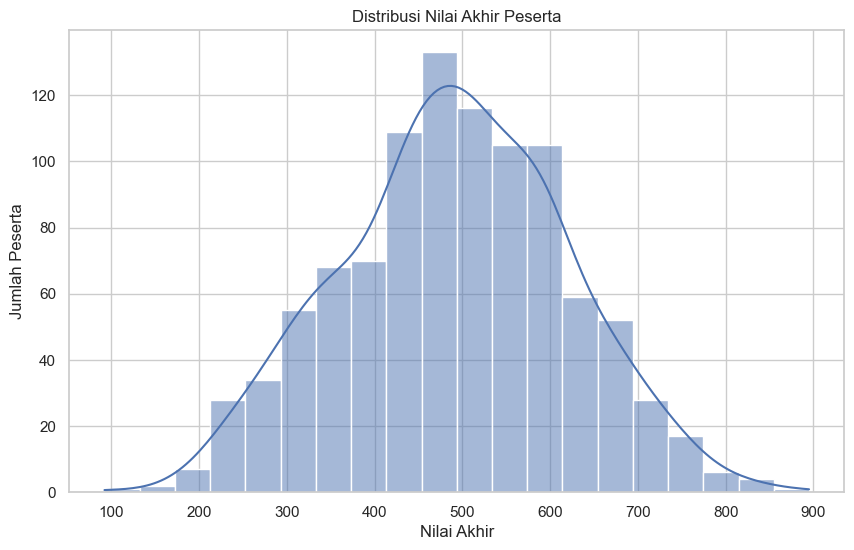

/var/folders/2b/4xgl7qvn3rb99tsw5hp_ntkh0000gp/T/ipykernel_35569/3713839858.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=query_2_df, x='jumlah_pendaftar', y='nama_prodi', palette='viridis')


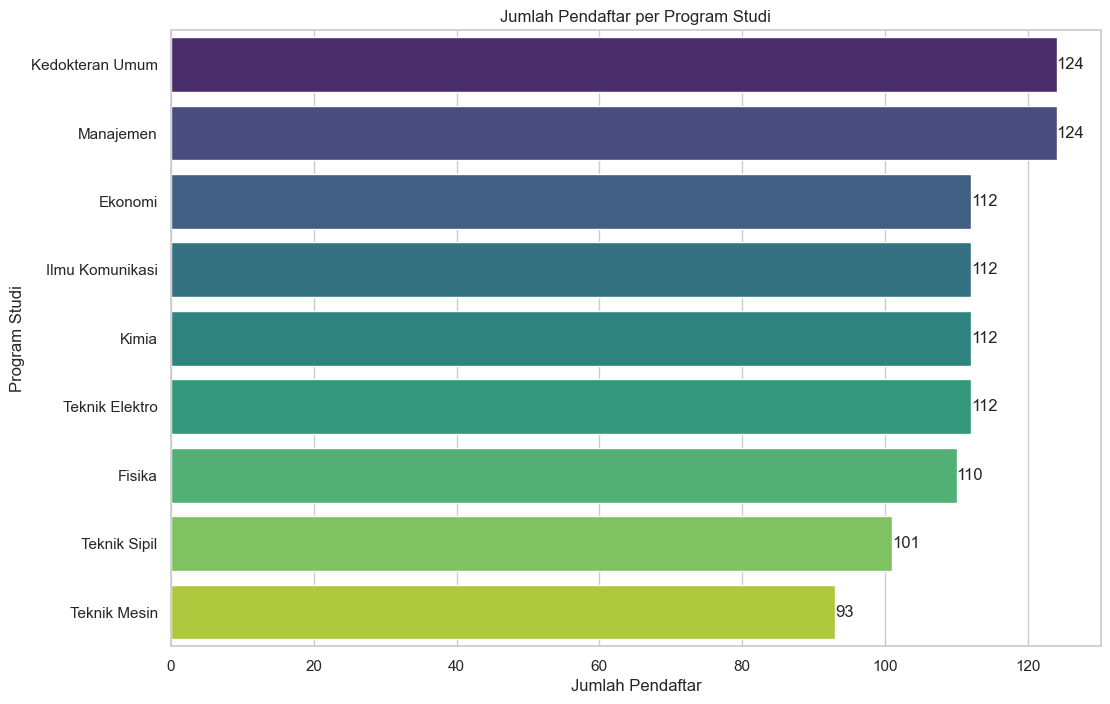

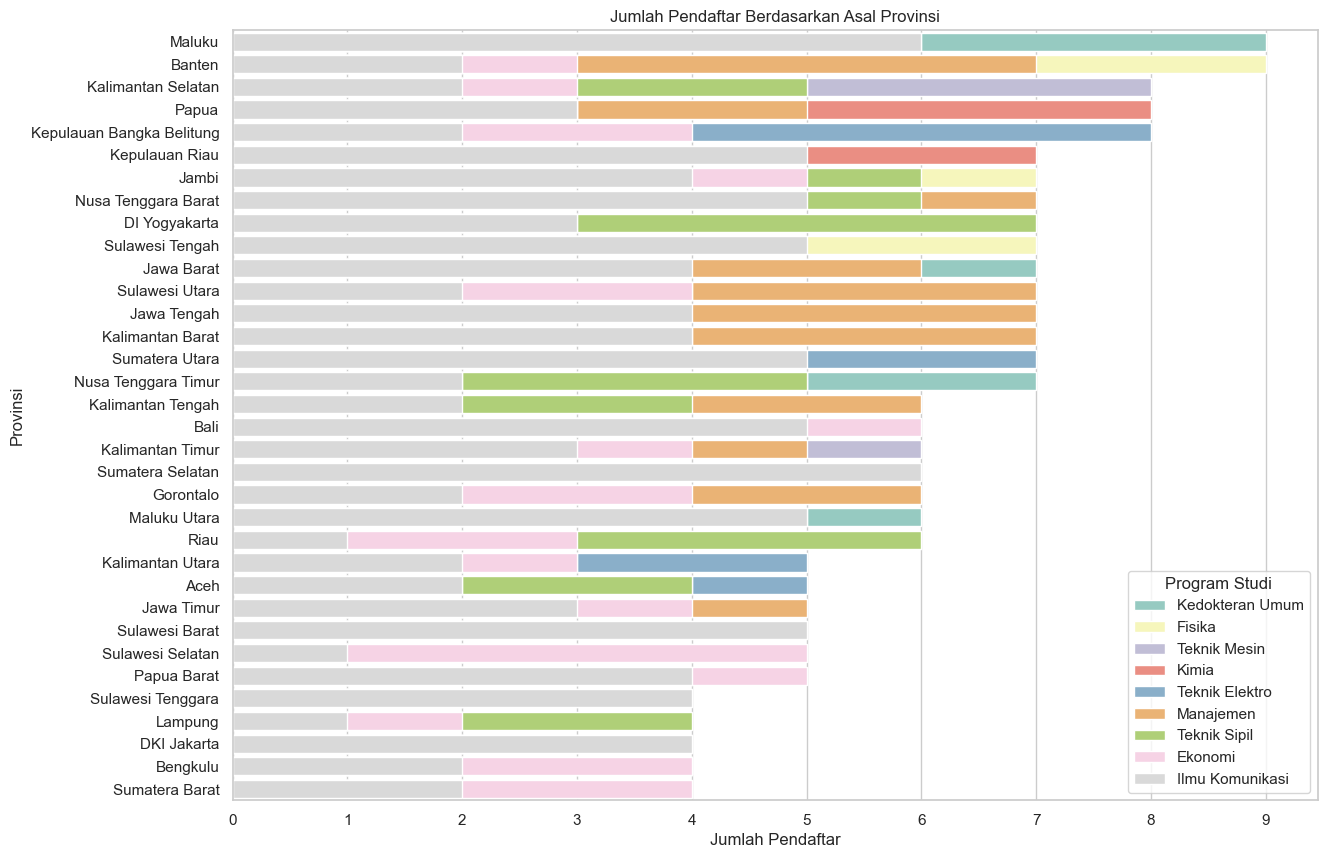

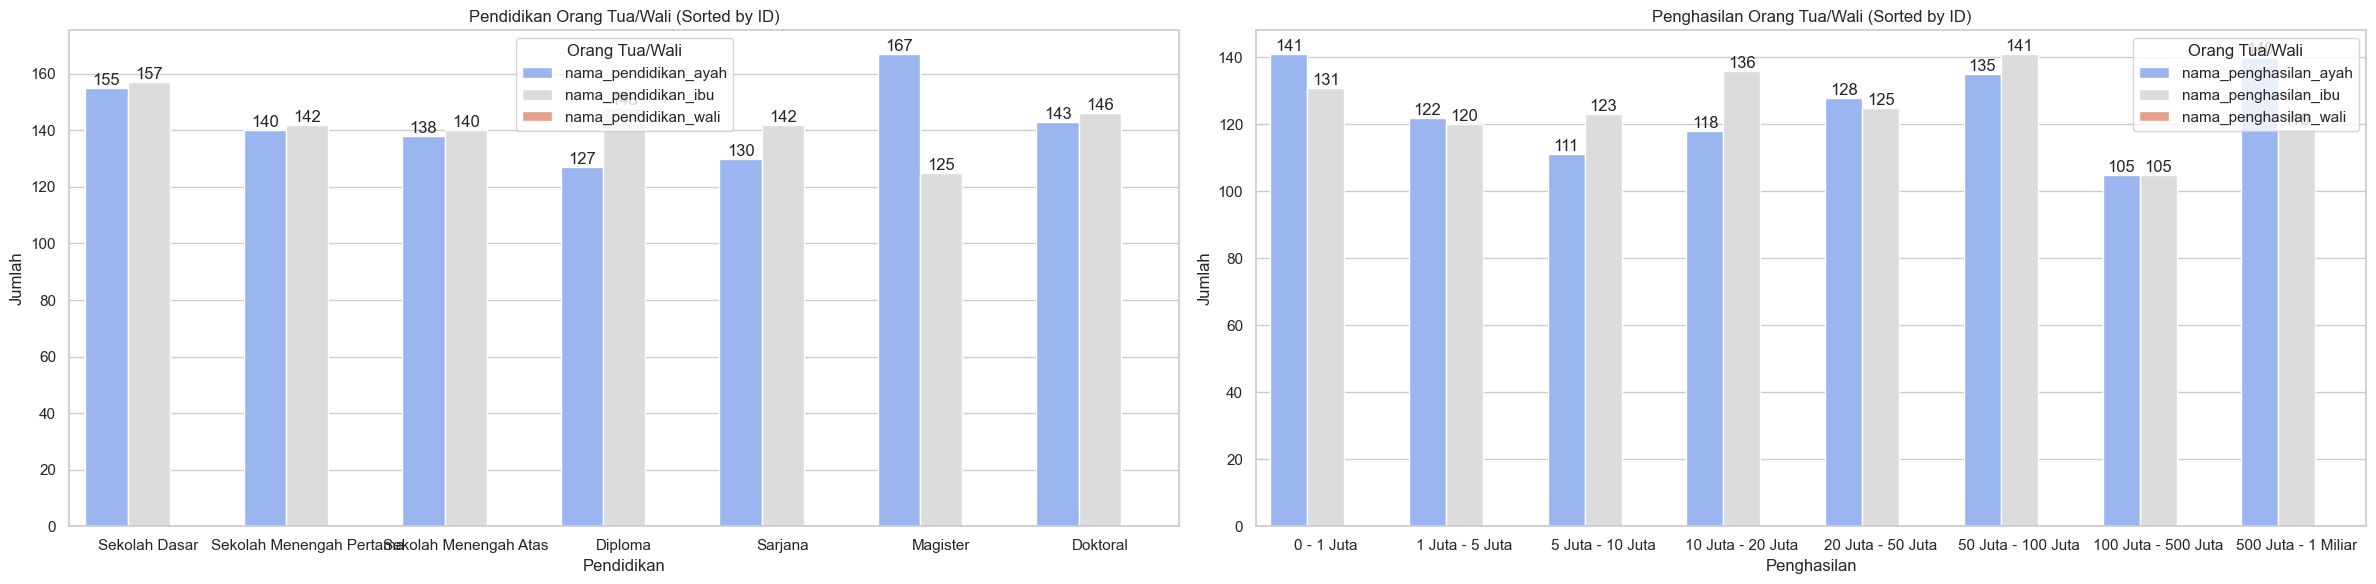

/var/folders/2b/4xgl7qvn3rb99tsw5hp_ntkh0000gp/T/ipykernel_35569/3713839858.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=program_counts, x='nama_prodi', y='jumlah_peserta', palette='Set3')


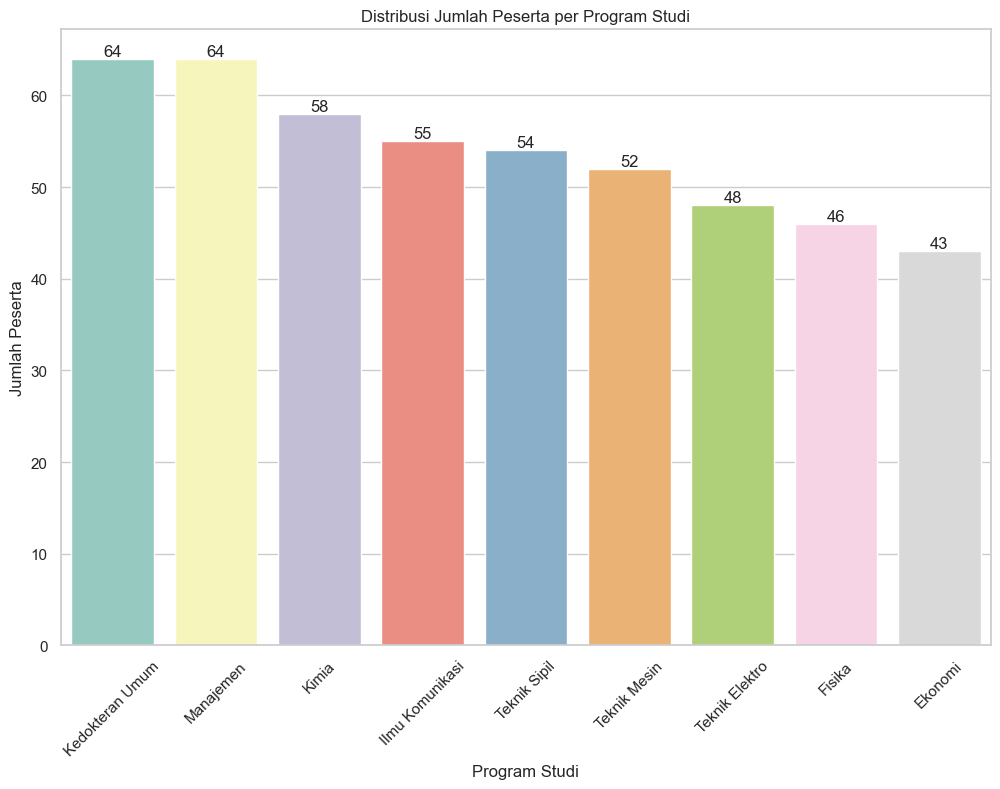

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load each CSV file into a DataFrame
query_1_df = pd.read_csv('query_1.csv')
query_2_df = pd.read_csv('query_2.csv')
query_3_df = pd.read_csv('query_3.csv')
query_4_df = pd.read_csv('query_4.csv')
query_5_df = pd.read_csv('query_5.csv')

# Set the visual style
sns.set(style="whitegrid")

# 1. query_1: Distribusi Nilai Akhir Peserta
plt.figure(figsize=(10, 6))
sns.histplot(query_1_df['nilai_akhir'], bins=20, kde=True)
plt.title('Distribusi Nilai Akhir Peserta')
plt.xlabel('Nilai Akhir')
plt.ylabel('Jumlah Peserta')
plt.grid(True)
plt.show()

# 2. query_2: Jumlah Pendaftar per Program Studi
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=query_2_df, x='jumlah_pendaftar', y='nama_prodi', palette='viridis')
plt.title('Jumlah Pendaftar per Program Studi')
plt.xlabel('Jumlah Pendaftar')
plt.ylabel('Program Studi')

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()

# 3. query_3: Jumlah Pendaftar Berdasarkan Asal Kabupaten/Kota
# Aggregate and sort data to sum the number of applicants for each combination of province and program study
aggregated_df = query_3_df.groupby(['asal_provinsi', 'nama_prodi'], as_index=False)['jumlah_pendaftar'].sum()
aggregated_df = aggregated_df.sort_values(by='jumlah_pendaftar', ascending=False)  # Sort by jumlah_pendaftar

# Generate the updated bar plot with sorted data
plt.figure(figsize=(14, 10))
ax = sns.barplot(data=aggregated_df, x='jumlah_pendaftar', y='asal_provinsi', hue='nama_prodi', dodge=False, palette='Set3')
plt.title('Jumlah Pendaftar Berdasarkan Asal Provinsi')
plt.xlabel('Jumlah Pendaftar')
plt.ylabel('Provinsi')
plt.legend(title='Program Studi')

# Ensure the x-axis uses increments of 1
ax.xaxis.set_major_locator(plt.MultipleLocator(1))

plt.show()

# 4. query_4: Pendidikan dan Penghasilan Orang Tua/Wali
# Extracting unique pairs of (id, name) for sorting
pendidikan_id_order = query_4_df[['id_pendidikan_ayah', 'nama_pendidikan_ayah']].dropna().drop_duplicates()
penghasilan_id_order = query_4_df[['id_penghasilan_ayah', 'nama_penghasilan_ayah']].dropna().drop_duplicates()

# Preparing order lists based on the IDs
pendidikan_order_sorted = pendidikan_id_order.sort_values(by='id_pendidikan_ayah')['nama_pendidikan_ayah'].tolist()
penghasilan_order_sorted = penghasilan_id_order.sort_values(by='id_penghasilan_ayah')['nama_penghasilan_ayah'].tolist()

# Updated plot
fig, axes = plt.subplots(1, 2, figsize=(28, 6))

# Pendidikan plot
ax1 = sns.countplot(data=pendidikan_melted, x='Pendidikan', hue='Orang Tua/Wali', palette='coolwarm', ax=axes[0], 
                    order=pendidikan_order_sorted)
axes[0].set_title('Pendidikan Orang Tua/Wali (Sorted by ID)')
axes[0].set_xlabel('Pendidikan')
axes[0].set_ylabel('Jumlah')

# Add labels to each bar in the Pendidikan plot
for container in ax1.containers:
    ax1.bar_label(container)

# Penghasilan plot
ax2 = sns.countplot(data=penghasilan_melted, x='Penghasilan', hue='Orang Tua/Wali', palette='coolwarm', ax=axes[1], 
                    order=penghasilan_order_sorted)
axes[1].set_title('Penghasilan Orang Tua/Wali (Sorted by ID)')
axes[1].set_xlabel('Penghasilan')
axes[1].set_ylabel('Jumlah')

# Add labels to each bar in the Penghasilan plot
for container in ax2.containers:
    ax2.bar_label(container)

plt.tight_layout()
plt.show()

# 5. query_5: Distribusi Jumlah Peserta per Program Studi
program_counts = query_5_df['nama_prodi'].value_counts().reset_index()
program_counts.columns = ['nama_prodi', 'jumlah_peserta']

# Plot the distribution
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=program_counts, x='nama_prodi', y='jumlah_peserta', palette='Set3')
plt.title('Distribusi Jumlah Peserta per Program Studi')
plt.xlabel('Program Studi')
plt.ylabel('Jumlah Peserta')
plt.xticks(rotation=45)

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()
